In [1]:
import numpy as np
import matplotlib.pyplot as plt

import helium4plusplus as he4

In [2]:
rgflow = np.loadtxt('datfiles/rg-flow-semilocal.dat')

In [3]:
systems = [he4.NonlocalHelium4System2(R, 0, 2, 6, 6) for R in rgflow[:, 0]]

In [31]:
import mu2.bind as bind

def wave_functions(sys, glo, gnlo):
    x = sys.interaction.counterterm.gen(glo, gnlo)
    evals, evecs = bind.bound_states(sys.v_tilde+x, 0, 0, sys.q, sys.wq, sys.mu)
    return evecs[:, ::-1]


def normalized_wave_functions(sys, glo, gnlo):
    evecs = wave_functions(sys, glo, gnlo)
    for j in range(evecs.shape[1]):
        C = np.dot(sys.wq, sys.q**2*evecs[:, j]**2)
        evecs[:, j] *= 1/np.sqrt(C)
    return evecs


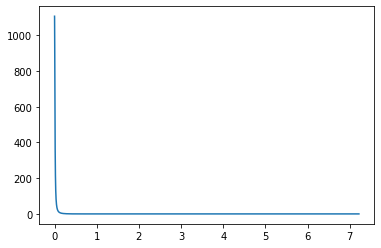

In [32]:
plt.plot(systems[0].q, normalized_wave_functions(systems[0], *rgflow[0, 1:]));

In [33]:
from scipy.special import spherical_jn

In [34]:
r = np.linspace(1e-3, 50, 2000)

def wave_functions_coord(sys, glo, gnlo):
    wf_momentum = normalized_wave_functions(sys, glo, gnlo)
    wf_coord = np.array([[np.sqrt(2/np.pi)*np.dot(sys.wq, sys.q**2*spherical_jn(0, ri*sys.q)*row) for ri in r]
        for row in wf_momentum.T])
    return wf_coord.T
    

In [35]:
for (s, gs) in zip(systems, rgflow[:, 1:]):
    print(s.bound_state_spectrum(*gs))

[-0.00131112]
[-0.00131106]
[-0.00131109]
[-0.00131103]
[-0.00131099]
[-0.00131094]
[-0.00131101]
[-1.31106026e-03 -8.65273689e+00]
[-1.31097434e-03 -1.79000981e+01]
[-1.31106971e-03 -2.67404154e+01]
[-1.31103890e-03 -3.30790005e+01]
[-1.31097635e-03 -3.78113303e+01]
[-1.31096695e-03 -4.21610752e+01]
[-1.31097506e-03 -4.61579711e+01]
[-1.31094824e-03 -4.95728957e+01]
[-1.31095599e-03 -5.31983278e+01]
[-1.31094195e-03 -5.66418458e+01]
[-1.31105125e-03 -6.12892910e+01]
[-1.31105412e-03 -6.51136100e+01]
[-1.31105508e-03 -6.90927292e+01]
[-1.31105401e-03 -7.32488018e+01]
[-1.31111563e-03 -7.82357870e+01]
[-1.31102032e-03 -8.19329729e+01]
[-1.31132113e-03 -8.99174289e+01]
[-1.31187400e-03 -1.02636498e+02]
[-1.31106159e-03 -9.80845831e+01]
[-1.31104121e-03 -1.10972675e+02]
[-1.31102797e-03 -1.18724557e+02]
[-1.31100439e-03 -1.27694517e+02]
[-1.31103488e-03 -1.38389260e+02]
[-1.31093545e-03 -1.50786939e+02]
[-1.31104275e-03 -4.01900512e+01 -2.36462795e+02]
[-1.31104444e-03 -6.08574165e+01 -3.

In [36]:
phis = [wave_functions_coord(sys, *gs) for (sys, gs) in zip(systems, rgflow[:, 1:])]

In [37]:
linestyles = ['-', '--', '-.']

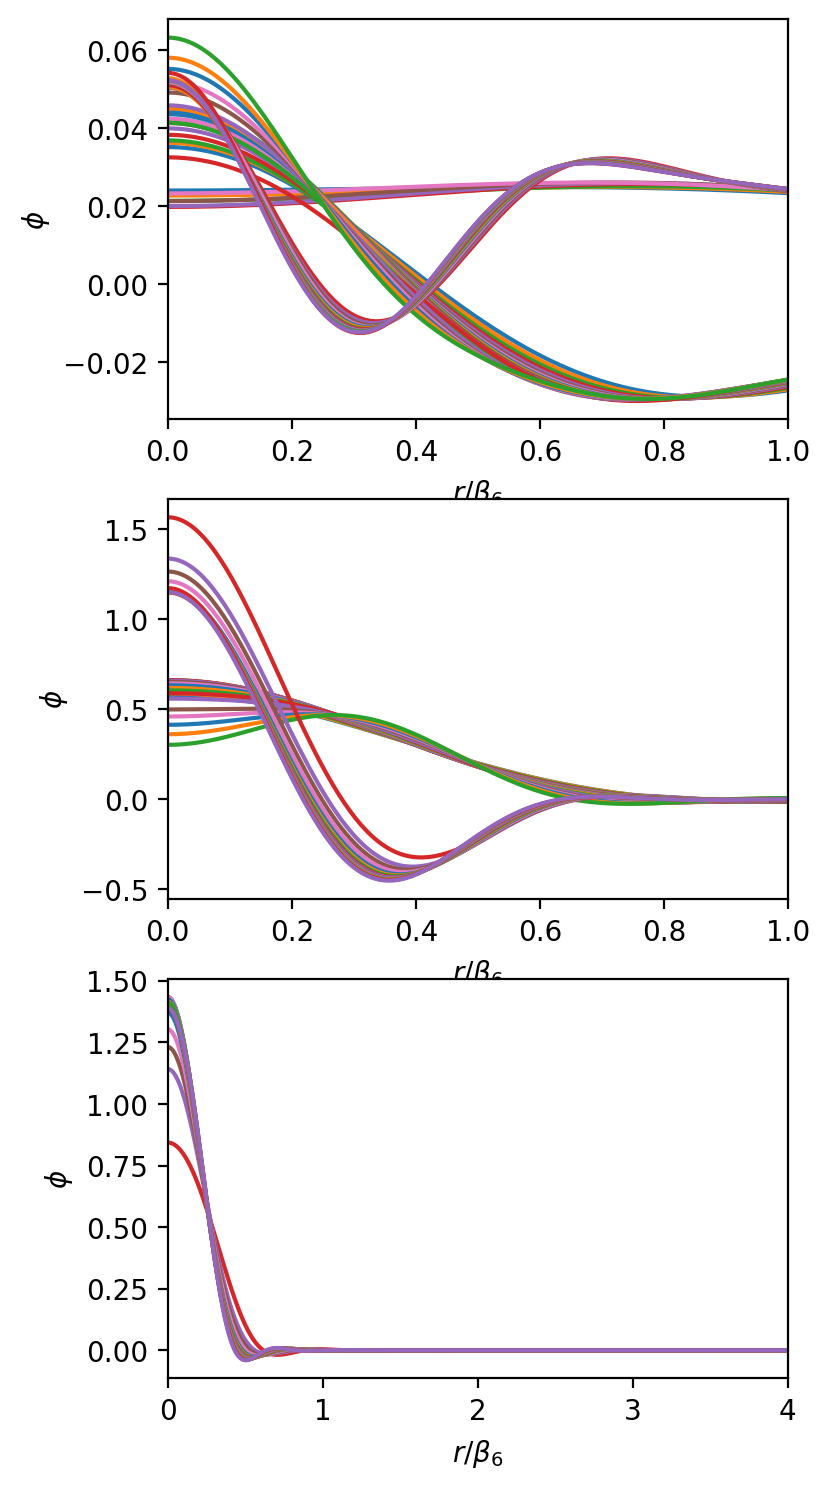

In [38]:
fig, ax = plt.subplots(3, figsize=(4, 3*3), dpi=200)
fig.patch.set_facecolor('white')

for (i, x) in enumerate(phis):
    for j in range(x.shape[1]):
        ax[j].plot(r/he4.BETA6, np.sign(x[0, j]) * x[:, j], color=rf'C{i%7}')

ax[0].set_xlim([0, 1])
ax[1].set_xlim([0, 1])
ax[2].set_xlim([0, 4])
for (i, axi) in enumerate(ax):
    axi.set_xlabel(r'$r/\beta_6$')
    axi.set_ylabel(r'$\phi$');

In [ ]:
wave_functions(systems[0], *rgflow[0, 1:]).shape

(200, 1)